# Python Weather API challenge

In [4]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=928cbb952ecb3f3cb9872bf25251ba202c12bb820a20170ab0de79e6370e2388
  Stored in directory: /Users/muthukrishnan/Library/Caches/pip/wheels/49/05/c1/6baa8ceb020ca642133e903591948e0fbe269e9c519aefd95d
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [6]:
weather_api_key

'8995b8e03dd9668cbec77b96c49d65ba'

# Generating cities list using citipy library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonthe
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | kirakira
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | bakchar
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | callao
Processing Record 12 of Set 1 | yagry
City not found. Skipping...
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | ciudad insurgentes
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | fisterra
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | georgetown
Processing Reco

Processing Record 39 of Set 4 | batam
City not found. Skipping...
Processing Record 40 of Set 4 | kailua-kona
Processing Record 41 of Set 4 | tanrake village
City not found. Skipping...
Processing Record 42 of Set 4 | kingston
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | soconusco
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | petropavlovsk-kamchatsky
Processing Record 48 of Set 4 | mombetsu
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | gbarnga
Processing Record 3 of Set 5 | vilyuchinsk
Processing Record 4 of Set 5 | mount pearl
Processing Record 5 of Set 5 | dakhla
Processing Record 6 of Set 5 | saint croix
Processing Record 7 of Set 5 | suntar
Processing Record 8 of Set 5 | ordos
City not found. Skipping...
Processing Record 9 of Set 5 | rikaze
Processing Record 10 of Set 5 | am djarass
City

Processing Record 28 of Set 8 | fort st. john
Processing Record 29 of Set 8 | magadan
Processing Record 30 of Set 8 | urengoy
Processing Record 31 of Set 8 | asilah
Processing Record 32 of Set 8 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 33 of Set 8 | salekhard
Processing Record 34 of Set 8 | sooke
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | mitu
Processing Record 37 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | lethem
Processing Record 40 of Set 8 | jiwani
Processing Record 41 of Set 8 | paramonga
Processing Record 42 of Set 8 | enewetak
Processing Record 43 of Set 8 | shimoda
Processing Record 44 of Set 8 | sinop
Processing Record 45 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 46 of Set 8 | ugoofaaru
Processing Record 47 of Set 8 | tyuratam
Processing Record 48 of Set 8 | villa alberto andres alvarado aramburo
City not found. Skipping...


Processing Record 16 of Set 12 | yirol
City not found. Skipping...
Processing Record 17 of Set 12 | baoshan
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | beloyarskiy
Processing Record 20 of Set 12 | buka
Processing Record 21 of Set 12 | big bend
Processing Record 22 of Set 12 | robore
Processing Record 23 of Set 12 | kamba
Processing Record 24 of Set 12 | qianzhou
Processing Record 25 of Set 12 | bourbonnais
Processing Record 26 of Set 12 | terrace
Processing Record 27 of Set 12 | linxia chengguanzhen
Processing Record 28 of Set 12 | columbus
Processing Record 29 of Set 12 | pionerskiy
Processing Record 30 of Set 12 | bakal
Processing Record 31 of Set 12 | rongelap
Processing Record 32 of Set 12 | minas de marcona
Processing Record 33 of Set 12 | nelidovo
Processing Record 34 of Set 12 | kill devil hills
Processing Record 35 of Set 12 | san miguel zapotitlan
Processing Record 36 of Set 12 | lata
Processing Record 37 of Set 12 | kyabe
Processing Record

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.5264,-12.5050,25.16,88,95,2.85,SL,1694987851
1,port-aux-francais,-49.3500,70.2167,5.26,96,100,12.94,TF,1694987851
2,port alfred,-33.5906,26.8910,12.53,80,0,3.52,ZA,1694987565
3,port mathurin,-19.6833,63.4167,22.90,76,2,9.30,MU,1694987853
4,invercargill,-46.4000,168.3500,9.45,83,88,4.92,NZ,1694987853


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bonthe,7.5264,-12.5050,25.16,88,95,2.85,SL,1694987851
1,port-aux-francais,-49.3500,70.2167,5.26,96,100,12.94,TF,1694987851
2,port alfred,-33.5906,26.8910,12.53,80,0,3.52,ZA,1694987565
3,port mathurin,-19.6833,63.4167,22.90,76,2,9.30,MU,1694987853
4,invercargill,-46.4000,168.3500,9.45,83,88,4.92,NZ,1694987853


# Create the Scatter Plots Requested

# Latitude VS temperatrure

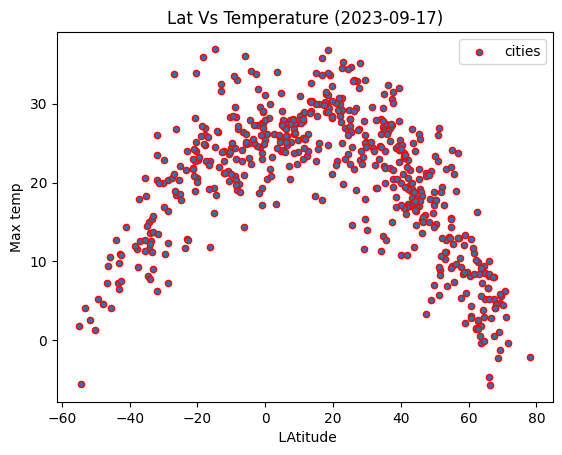

In [23]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x = "Lat", y = "Max Temp",
    edgecolor="red",
    linewidths=1,
    marker="o",
    label="cities"    
)
# Incorporate the other graph properties
# YOUR CODE HERE
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Temperature ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Max temp")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs HUmidity

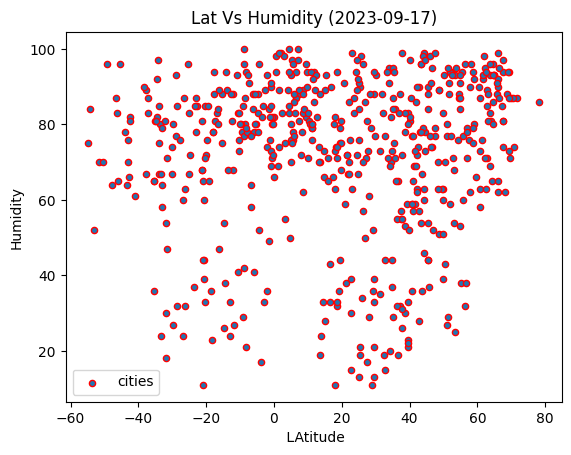

In [27]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity",
    edgecolor="red",
    linewidths=1,
    marker="o",
    label="cities"  
                         )
# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Humidity ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latutude Vs Cloudiness

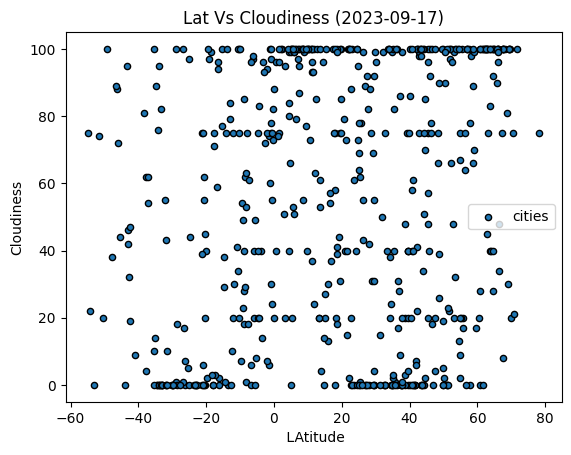

In [30]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="cities"  
                         )

# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Cloudiness ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude Vs Wind Speed

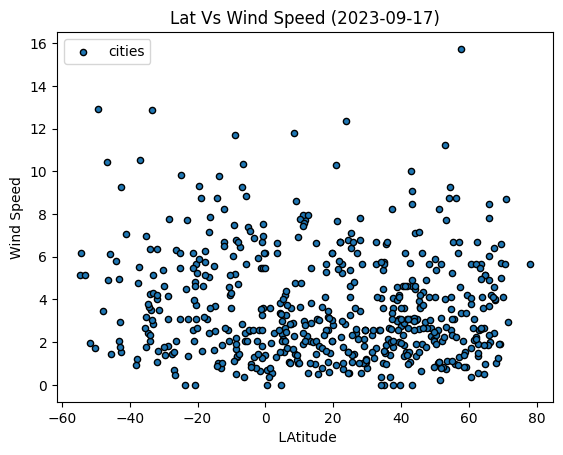

In [31]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="cities"  
                         )

# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"Lat Vs Wind Speed ({date})")
plt.xlabel(" LAtitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [83]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_value, y_value, title, text_coord):
      
    (slope, intercept, rvalue, value, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x = {round(intercept,2)} "
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f" The r-value is {rvalue ** 2}")
    plt.show()
    
    
    

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.5264,-12.5050,25.16,88,95,2.85,SL,1694987851
7,iqaluit,63.7506,-68.5145,1.85,69,40,5.66,CA,1694987855
8,bakchar,57.0186,82.0711,13.00,79,100,1.29,RU,1694987856
9,whitehorse,60.7161,-135.0538,12.83,63,100,5.66,CA,1694987717
11,la passe,45.5549,-0.8967,19.13,90,57,3.67,FR,1694987858


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port-aux-francais,-49.3500,70.2167,5.26,96,100,12.94,TF,1694987851
2,port alfred,-33.5906,26.8910,12.53,80,0,3.52,ZA,1694987565
3,port mathurin,-19.6833,63.4167,22.90,76,2,9.30,MU,1694987853
4,invercargill,-46.4000,168.3500,9.45,83,88,4.92,NZ,1694987853
5,kirakira,-10.4544,161.9205,28.34,76,100,4.22,SB,1694987854


# Temperature vs. Latitude Linear Regression Plot

 The r-value is 0.6273254692652838


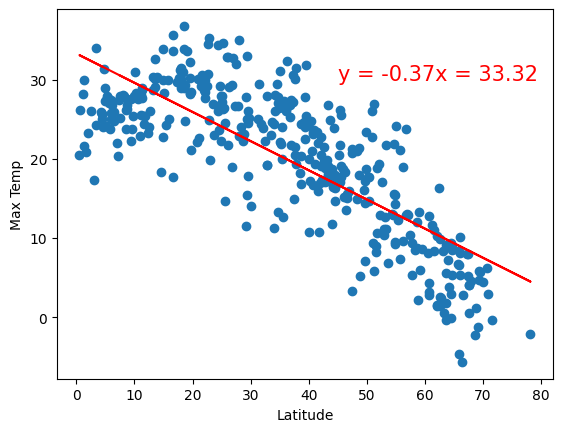

In [87]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (45, 30))


 The r-value is 0.6036699811820183


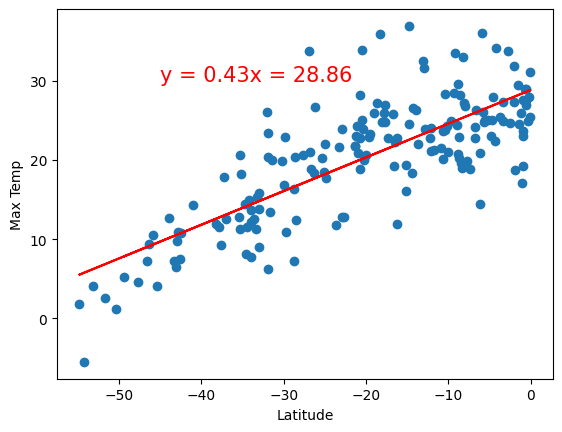

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-45, 30))


### In this regression plot, in northern hemisphere when latitude increases , temperature keeps decreasing proportionally. 
### Whereas in southern hemosphere, temperature increases when latitude increased. R value lies between -1 and 1 which reflects the correlation between these two factors. 

# Humidity vs. Latitude Linear Regression Plot

 The r-value is 0.003014218188079556


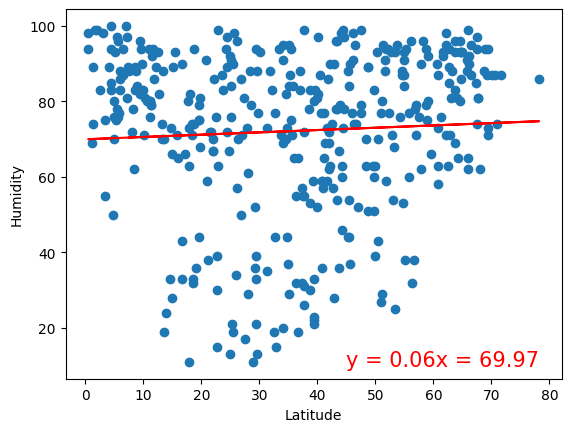

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 10))


 The r-value is 0.0012160955152571904


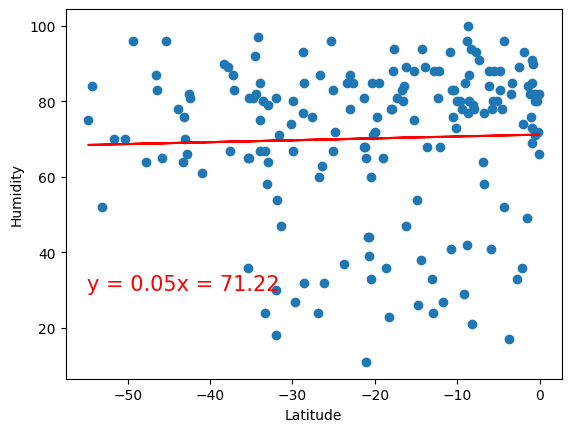

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 30))

### In this regression plot, in both northern and southern hemisphere when latitude increases , humidity slightly differed in increments. R value lies between -1 and 1 which reflects the correlation between these two factors. 



# Cloudiness vs. Latitude Linear Regression Plot

 The r-value is 0.0002812020403913141


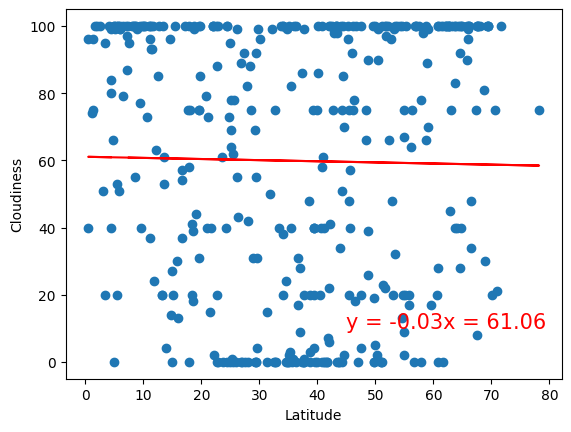

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45, 10))

 The r-value is 0.03353038618654625


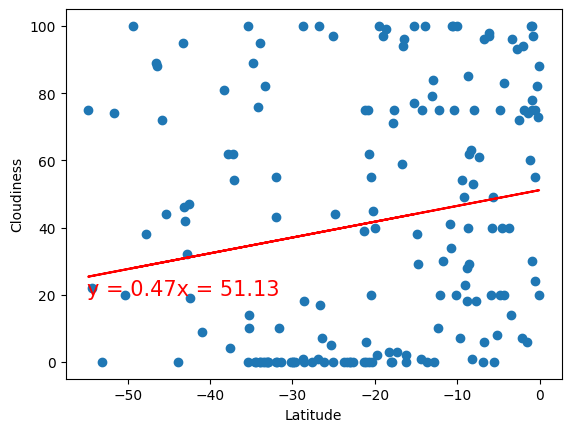

In [93]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 20))

### In this regression plot, in northern hemisphere there is no notable difference in cloudiness when latitide increases. Whereas in souther hemisphere cloudiness increases when latitude increased. R value lies between -1 and 1 which reflects the correlation between these two factors. 

# Wind Speed vs. Latitude Linear Regression Plot

 The r-value is 0.007564216425602482


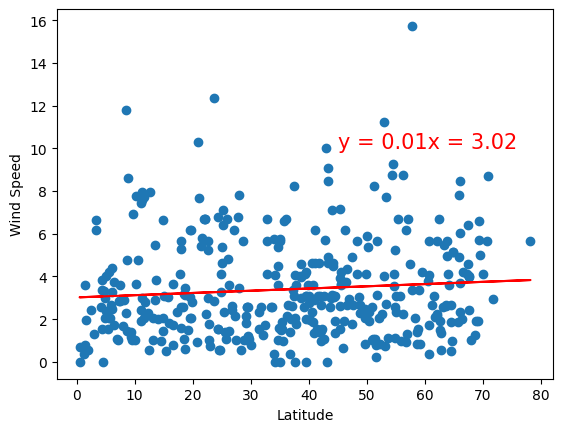

In [94]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (45, 10))

 The r-value is 0.003926465558850397


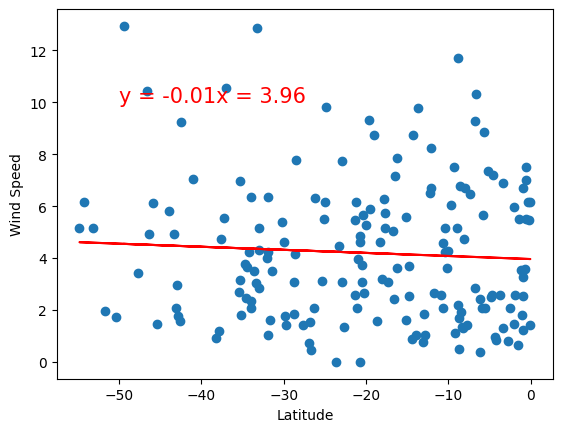

In [110]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

### In this regression plot, in northern hemisphere wind speed increases slightly when latitude increased whereas in southern hemisphere sloight decreaase in wind speed when latitude increases. R value lies between -1 and 1 which reflects the correlation between these two factors. 